In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
DATA_PATH = "../lotto.xlsx"

In [16]:
data = pd.read_excel(DATA_PATH, header=[1, 2])

In [18]:
data.head()

년도                 회차                추첨일   1등  \
  Unnamed: 0_level_1 Unnamed: 1_level_1 Unnamed: 2_level_1 당첨자수   
0             2023.0               1098         2023.12.16   13   
1                NaN               1097         2023.12.09    7   
2                NaN               1096         2023.12.02   10   
3                NaN               1095         2023.11.25   10   
4                NaN               1094         2023.11.18   12   

                    2등                 3등                  4등           \
             당첨금액 당첨자수         당첨금액  당첨자수        당첨금액    당첨자수     당첨금액   
0  1,930,461,895원   68  61,509,816원  2840  1,472,771원  138090  50,000원   
1  3,864,293,090원   67  67,288,686원  2631  1,713,547원  135670  50,000원   
2  2,539,391,175원   85  49,791,984원  2924  1,447,442원  141700  50,000원   
3  2,617,825,575원   57  76,544,608원  2584  1,688,484원  135653  50,000원   
4  2,112,854,469원   87  48,571,368원  2725  1,550,719원  136802  50,000원   

        5등         당첨번호                          
      당첨자수    당첨금액    1   2   3   4   5   6 보너스  
0  2311866  5,000원   12  16  21  24  41  43  15  
1  2317263  5,000원   14  33  34  35  37  40   4  
2  2386598  5,000원    1  12  16  19  23  43  34  
3  2278659  5,000원    8  14  28  29  34  40  12  
4  2278728  5,000원    6   7  15  22  26  40  41

In [23]:
N = len(data)
print(f"총 횟수: {N}")

총 횟수: 1098


In [40]:
numbers = data['당첨번호'].values.flatten()

In [196]:
counts.sum()

7686

/tmp/ipykernel_164/3333748705.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  counts = pd.value_counts(numbers)


Text(0.5, 1.0, 'Historical frequency for numbers in Lotto (1st ~ 1098th, 7686 numbers)')

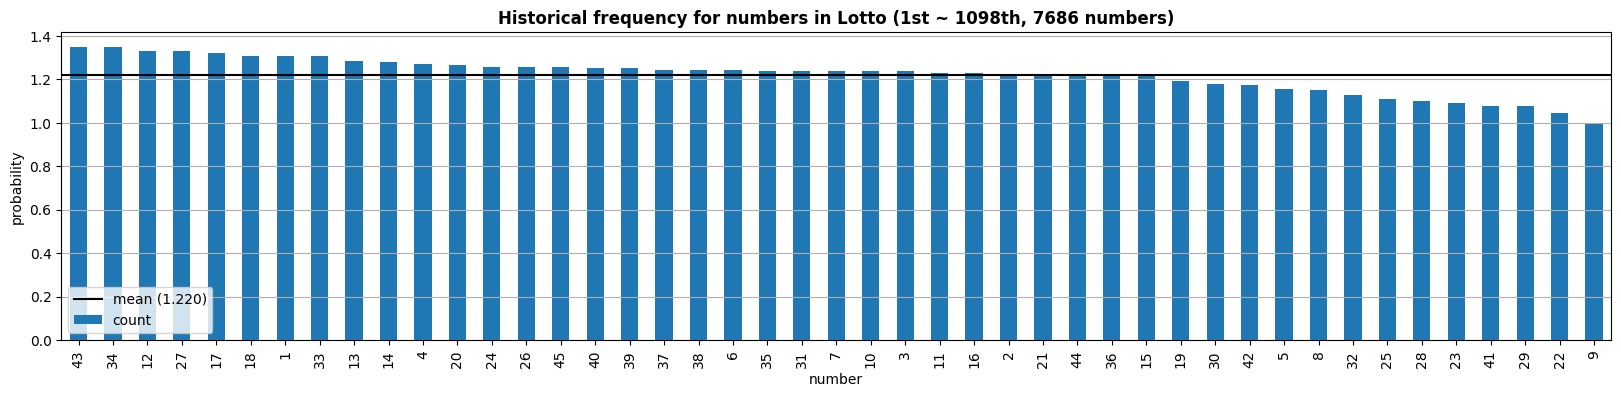

In [206]:
counts = pd.value_counts(numbers)
min_count = counts.values[-1]
ax = (counts/min_count).plot.bar(figsize=(20, 4), xlabel='number', ylabel='probability')
mean_proba = counts.sum()/45 / min_count
ax.axhline(mean_proba, color='k', label=f'mean ({mean_proba:.3f})')
ax.legend(loc='lower left')
ax.grid(axis='y')
ax.set_title(f"Historical frequency for numbers in Lotto (1st ~ 1098th, {counts.sum()} numbers)", fontweight='bold')

## Random

In [89]:
random = lambda: sorted(np.random.choice(np.arange(1, 46), size=7, replace=False))
randoms = [random() for _ in range(5)]
randoms

[[3, 14, 21, 25, 31, 32, 40],
 [2, 6, 15, 18, 20, 25, 29],
 [8, 18, 20, 22, 26, 33, 44],
 [8, 12, 15, 20, 23, 24, 45],
 [11, 22, 31, 32, 35, 38, 43]]

# Most Commons

In [124]:
most_common  = lambda n: sorted(counts.head(n)[-7:].index)
most_commons = [most_common(n) for n in range(7, 7+5)]
most_commons

[[1, 12, 17, 18, 27, 34, 43],
 [1, 12, 17, 18, 27, 33, 34],
 [1, 12, 13, 17, 18, 27, 33],
 [1, 13, 14, 17, 18, 27, 33],
 [1, 4, 13, 14, 17, 18, 33]]

# Least Commons

In [118]:
least_common  = lambda n: sorted(counts.tail(n)[:7].index)
least_commons = [least_common(n) for n in range(7, 7+5)]
least_commons

[[9, 22, 23, 25, 28, 29, 41],
 [22, 23, 25, 28, 29, 32, 41],
 [8, 23, 25, 28, 29, 32, 41],
 [5, 8, 23, 25, 28, 32, 41],
 [5, 8, 23, 25, 28, 32, 42]]

# Most Least Mixs

In [137]:
most_least_mix  = lambda n: sorted(counts.head(7)[:n].index.append(counts.tail(7)[-(7-n):].index))
most_least_mixs = [most_least_mix(n) for n in range(2, 7)]
most_least_mixs

[[9, 22, 23, 29, 34, 41, 43],
 [9, 12, 22, 29, 34, 41, 43],
 [9, 12, 22, 27, 29, 34, 43],
 [9, 12, 17, 22, 27, 34, 43],
 [9, 12, 17, 18, 27, 34, 43]]

In [ ]:
무작위 숫자 모음
[[3, 14, 21, 25, 31, 32, 40],
 [2, 6, 15, 18, 20, 25, 29],
 [8, 18, 20, 22, 26, 33, 44],
 [8, 12, 15, 20, 23, 24, 45],
 [11, 22, 31, 32, 35, 38, 43]]

가장 많이 나온 숫자 모음
[[1, 12, 17, 18, 27, 34, 43],
 [1, 12, 17, 18, 27, 33, 34],
 [1, 12, 13, 17, 18, 27, 33],
 [1, 13, 14, 17, 18, 27, 33],
 [1, 4, 13, 14, 17, 18, 33]]

가장 적게 나온 숫자 모음
[[9, 22, 23, 25, 28, 29, 41],
 [22, 23, 25, 28, 29, 32, 41],
 [8, 23, 25, 28, 29, 32, 41],
 [5, 8, 23, 25, 28, 32, 41],
 [5, 8, 23, 25, 28, 32, 42]]

가장 많이 나온 숫자 + 가장 적게 나온 숫자 혼합 모음
[[9, 22, 23, 29, 34, 41, 43],
 [9, 12, 22, 29, 34, 41, 43],
 [9, 12, 22, 27, 29, 34, 43],
 [9, 12, 17, 22, 27, 34, 43],
 [9, 12, 17, 18, 27, 34, 43]]